# Problems 1 - Linear Regression

During the lecture, we used a running example of house prices. This dataset is known as the "house prices" dataset. The task to be done is to predict the price of a house given some 'features' of the house. Our input data comprises two features per sample (size of the house, and number of rooms), while the output data is the price of each sample.

Here is the data:

| Size (square feet) | Rooms | Price (USD) |Size (square feet) | Rooms | Price (USD) |Size (square feet) | Rooms | Price (USD) |Size (square feet) | Rooms | Price (USD) |
|:------ |:----|:----------|:------ |:----|:----------|:------ |:----|:----------|:------ |:----|:----------|
| 2104.0 | 3.0 |  **399900.0** | 1890.0 | 3.0 |  **329999.0** | 3890.0 | 3.0 |  **573900.0** | 1239.0 | 3.0 |  **229900.0** |
| 1600.0 | 3.0 |  **329900.0** | 4478.0 | 5.0 |  **699900.0** | 1100.0 | 3.0 |  **249900.0** | 2132.0 | 4.0 |  **345000.0** |
| 2400.0 | 3.0 |  **369000.0** | 1268.0 | 3.0 |  **259900.0** | 1458.0 | 3.0 |  **464500.0** | 4215.0 | 4.0 |  **549000.0** | 
| 1416.0 | 2.0 |  **232000.0** | 2300.0 | 4.0 |  **449900.0** | 2526.0 | 3.0 |  **469000.0** | 2162.0 | 4.0 |  **287000.0** |
| 3000.0 | 4.0 |  **539900.0** | 1320.0 | 2.0 |  **299900.0** | 2200.0 | 3.0 |  **475000.0** | 1664.0 | 2.0 |  **368500.0** | 
| 1985.0 | 4.0 |  **299900.0** | 1236.0 | 3.0 |  **199900.0** | 2637.0 | 3.0 |  **299900.0** | 2238.0 | 3.0 |  **329900.0** | 
| 1534.0 | 3.0 |  **314900.0** | 2609.0 | 4.0 |  **499998.0** | 1839.0 | 2.0 |  **349900.0** | 2567.0 | 4.0 |  **314000.0** | 
| 1427.0 | 3.0 |  **198999.0** | 3031.0 | 4.0 |  **599000.0** | 1000.0 | 1.0 |  **169900.0** | 1200.0 | 3.0 |  **299000.0** | 
| 1380.0 | 3.0 |  **212000.0** | 1767.0 | 3.0 |  **252900.0** | 2040.0 | 4.0 |  **314900.0** | 852.0  | 2.0 |  **179900.0** | 
| 1494.0 | 3.0 |  **242500.0** | 1888.0 | 2.0 |  **255000.0** | 3137.0 | 3.0 |  **579900.0** | 1852.0 | 4.0 |  **299900.0** | 
| 1940.0 | 4.0 |  **239999.0** | 1604.0 | 3.0 |  **242900.0** | 1811.0 | 4.0 |  **285900.0** | 1203.0 | 3.0 |  **239500.0** | 
| 2000.0 | 3.0 |  **347000.0** | 1962.0 | 4.0 |  **259900.0** | 1437.0 | 3.0 |  **249900.0** | 
 
 
 
 
 
 
 
 
 
 
 


Let's first get them into Python. For simplification we are going to use only one feature for the time being - the size of the house.

In [1]:
size = [2104., 1600., 2400., 1416., 3000., 1985., 1534., 1427., 1380., 
       1494., 1940., 2000., 1890., 4478., 1268., 2300., 1320., 1236.,
       2609., 3031., 1767., 1888., 1604., 1962., 3890., 1100., 1458.,
       2526., 2200., 2637., 1839., 1000., 2040., 3137., 1811., 1437.,
       1239., 2132., 4215., 2162., 1664., 2238., 2567., 1200.,  852.,
       1852., 1203.]

rooms = [3., 3., 3., 2., 4., 4., 3., 3., 3., 3., 4., 3., 3., 5., 3., 4., 2.,
       3., 4., 4., 3., 2., 3., 4., 3., 3., 3., 3., 3., 3., 2., 1., 4., 3.,
       4., 3., 3., 4., 4., 4., 2., 3., 4., 3., 2., 4., 3.]

price = [399900., 329900., 369000., 232000., 539900., 299900., 314900.,
       198999., 212000., 242500., 239999., 347000., 329999., 699900.,
       259900., 449900., 299900., 199900., 499998., 599000., 252900.,
       255000., 242900., 259900., 573900., 249900., 464500., 469000.,
       475000., 299900., 349900., 169900., 314900., 579900., 285900.,
       249900., 229900., 345000., 549000., 287000., 368500., 329900.,
       314000., 299000., 179900., 299900., 239500.]

<br>

<font color=blue>How many samples do we have in our dataset?</font>

In [7]:
# Your Code Here #
print(len(price))
print(len(rooms))
print(len(size))


47
47
47


<br>

<font color=blue>Do a scatter plot of size versus price</font> (you can ignore the number of rooms for now)

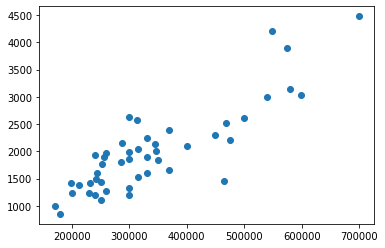

In [8]:
# Your Code Here #
import matplotlib.pyplot as plt
plt.scatter(size, price)
plt.show()


We want to automatically find a model to predict prices $y$ for houses that are not in our dataset. In linear regression, the model $h$ is a linear function of the input data ($x$, in our case the house size):

> $h_\theta(x) = \theta_0 + \theta_1 x$

For this we need to choose the parameters $\theta_i$ minimizing a cost function $J$ e.g. the average squared difference between the predictions ($h_\theta$) and the real prices ($y$) in our training data:

> $\hat{\theta} = \underset{\theta}{\text{minimize}} {1 \over 2m} \sum_{i=1}^m{(h_\theta(x^{(i)}) - y^{(i)})^2}$

where $(x^{(i)},y^{(i)})$ is the i-th training sample, and $m$ is the number of samples in our training set.

This optimization problem can be solved in different ways, in this example we are going to implement the Gradient Descent algorithm. In pseudo-code the Gradient Descent algorithm is formalized as follows:

repeat until convergence:

> {
> 
> $\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta)$ (for all j)
>
> }

where $\alpha$ is the learning rate, and the partial derivative (the gradient) of the cost function is given by:

> $\frac{\partial}{\partial \theta_j} J(\theta) = {1 \over m} \sum_{i=1}^m{(h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}}$

Let's see a first (quite inefficient) version of the Gradient Descent algorithm in Python:

In [2]:
def GradientDescent(x, y, max_iterations=100, alpha=0.00000001):
    m = len(x) # number of samples
   
    #initialize the parameters to zero (or any other random value)
    theta0 = 0
    theta1 = 0
    
    for it in range(max_iterations): #lets take a max of max_iteration steps updating the parameters
        s0 = 0 # We will use this to calculate the sum inside the cost function
        s1 = 0
        for i in range(m): #Go over the points and calculate the sum
            h = theta0 + theta1 * x[i]
            s0 = s0 + (h - y[i])
            s1 = s1 + (h - y[i])* x[i]
        Grad0 = s0 / m 
        Grad1 = s1 / m 
        
        theta0 = theta0 - alpha * Grad0
        theta1 = theta1 - alpha * Grad1
        
    return [theta0, theta1]
    
theta = GradientDescent(size, price)

print(theta)

[0.08050805332714407, 163.9249033496211]


<br>

<font color=blue>Plot the points of our dataset and a line using the parameter values `theta` that you calculated</font>

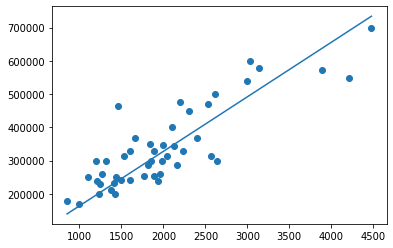

In [7]:
# Your Code Here #
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(min(size), max(size), 100)
y = theta[0] + theta[1] * x
plt.figure()
plt.scatter(size, price)
plt.plot(x, y)
plt.show()


<br>

<font color=blue>Use the model you have calculated to predict the price of a house with `size = 3200` square feet.</font>

In [9]:
# Your Code Here #
print("price with size = 3200 is ", theta[0] + theta[1] * 3200)

price with size = 3200 is  524559.7712268408


<br>

There are existing implementations for linear regression available for Python. For example, using the sklearn module's implementation, it would be:

In [10]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = np.array(size).reshape(-1, 1)
y = price

reg = LinearRegression().fit(x, y)

print('The estimated value of theta 0 (the intercept of the line) is: {0}'.format(reg.intercept_))
print('The estimated value of theta 1 (the slope) is: {0}'.format(reg.coef_[0]))

print('The estimated price for a house with size = 3200 using the model would be: {0}'.format(reg.predict([[3200]])))

The estimated value of theta 0 (the intercept of the line) is: 71270.49244872917
The estimated value of theta 1 (the slope) is: 134.5252877202413
The estimated price for a house with size = 3200 using the model would be: [501751.4131535]


<br>

<font color=blue>Have a look at the help pages for the `LinearRegression()` function of `sklearn`, as well as a read of the help page of the function [https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) </font>